### mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/300/'

os.chdir(current_path)

Mounted at /content/drive


### load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(current_path)


interval = '30m'
interval = '1m'
date_path = './candlestick_concated/%s/2021-04-27/' % interval
date_path = './candlestick_concated/%s/2021-05-17/' % interval
date_path = './candlestick_concated/%s/2021-06-14/' % interval
file_list = os.listdir(date_path)

print((file_list))

['2021-06-14 KNCUSDT.xlsx', '2021-06-14 OMGUSDT.xlsx', '2021-06-14 ZRXUSDT.xlsx', '2021-06-14 COMPUSDT.xlsx', '2021-06-14 ALGOUSDT.xlsx', '2021-06-14 SNXUSDT.xlsx', '2021-06-14 THETAUSDT.xlsx', '2021-06-14 MKRUSDT.xlsx', '2021-06-14 WAVESUSDT.xlsx', '2021-06-14 BNBUSDT.xlsx', '2021-06-14 DOTUSDT.xlsx', '2021-06-14 NEOUSDT.xlsx', '2021-06-14 BATUSDT.xlsx', '2021-06-14 QTUMUSDT.xlsx', '2021-06-14 ONTUSDT.xlsx', '2021-06-14 IOTAUSDT.xlsx', '2021-06-14 ATOMUSDT.xlsx', '2021-06-14 XTZUSDT.xlsx', '2021-06-14 BANDUSDT.xlsx', '2021-06-14 DASHUSDT.xlsx', '2021-06-14 KAVAUSDT.xlsx', '2021-06-14 ZECUSDT.xlsx', '2021-06-14 ADAUSDT.xlsx', '2021-06-14 XMRUSDT.xlsx', '2021-06-14 SXPUSDT.xlsx', '2021-06-14 XLMUSDT.xlsx', '2021-06-14 LTCUSDT.xlsx', '2021-06-14 EOSUSDT.xlsx', '2021-06-14 XRPUSDT.xlsx', '2021-06-14 LINKUSDT.xlsx', '2021-06-14 ETCUSDT.xlsx', '2021-06-14 BCHUSDT.xlsx', '2021-06-14 BTCUSDT.xlsx', '2021-06-14 ETHUSDT.xlsx']


### weather data

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13574144/13568290 [==============================] - 0s 0us/step


In [ ]:
df = pd.read_csv(csv_path)
# slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [ ]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame
df['wv (m/s)'].min()

0.0

In [ ]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

### basic fishing (not concerned about rapid descending)

In [ ]:
from tqdm.notebook import tqdm
from funcs_indicator import *
import matplotlib.pyplot as plt

# import mpl_finance as mf


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

np.random.shuffle(file_list)
candis = file_list

prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

tp_list = np.arange(0.0, 0.05, 0.001)
lvrg_list = range(1, 10)
lvrg_list = range(3, 7)
lvrg_list = range(6, 10)
lvrg_list = range(1, 2)
lvrg_list = range(5, 6)

for i in tqdm(range(len(candis))):

  keys = [candis[i]]

  if 'dot'.upper() not in candis[i]:
    continue
  
  # if 'btc'.upper() not in candis[i]:
  #   continue

  # if 'eth'.upper() not in candis[i]:
  #   continue

  for key in keys:  
    
    ohlcv = pd.read_excel(date_path + key, index_col=0)
    print('len(ohlcv) :', len(ohlcv))

    #     find best lvrg with lq    #
    # for lvrg in lvrg_list:
      
    #   #       tp opt      #
    #   best_tp = None
    #   best_ap = 0
    #   best_pr = None

    #   #        find best tp       #
    #   for tp in tp_list:

    #     long_ep = ohlcv['close'].shift(1) * (1 / (tp + 1))

    #     #       long      #
    #     pr = (ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
    #     #     set condition   #
    #     pr = np.where(ohlcv['low'] < long_ep, pr, 1)
      
    #     lq = (ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

    #     # plt.plot(np.cumprod(pr))
    #     # plt.show()
    #     # break

    #     #       short       #
    #     # s_pr = (-ohlcv['close'].pct_change() - fee) * lvrg + 1

    #     #       fill na with 1.0      #
    #     pr = np.where(np.isnan(pr), 1, pr)
    #     # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
    #     lq = np.where(np.isnan(lq), 1, lq)
    #     # s_pr = np.where(np.isnan(s_pr), 1, pr)

    #     #       set lq      #
    #     pr = np.where((pr != 1) & (lq <= 0), 0, pr)
    #     # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

    #     # plt.plot(np.cumprod(pr))
    #     # plt.title("%.3f" % tp)
    #     # plt.show()
    #     # plt.close()

    #     ap = np.cumprod(pr)[-1]
    #     if ap >= best_ap:
    #       best_ep = long_ep
    #       best_ap = ap
    #       best_tp = tp
    #       best_pr = pr

      # best_pr = np.array(best_pr)
      # org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

      # # plt.figure(figsize=(10, 4))
      # plt.figure(figsize=(6, 4))
      # # plt.subplot(121)
      # plt.plot(np.cumprod(best_pr))
      # plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr, np.cumprod(best_pr)[-1], best_tp, lvrg))

      
      # #     avoid dropping    #      
      # # ema = ohlcv['close'].ewm(span=190, min_periods=190-1, adjust=False).mean()
      # # # avoid_pr = np.where(ohlcv['close'].shift(1) > ema.shift(1), test_pr, 1)

      # # avoid_pr = np.where(ema.shift(1) > ema.shift(2), best_pr, 1)

      # # # ma = ohlcv['close'].rolling(120).mean()
      # # # avoid_pr = np.where(ma.shift(1) > ma.shift(2), best_pr, 1)

      # # avoid_wr = len(avoid_pr[avoid_pr > 1]) / len(avoid_pr[avoid_pr != 1])

      
      # # plt.subplot(122)
      # # plt.plot(np.cumprod(avoid_pr))
      # # plt.title("%s\navoid_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, avoid_wr, np.cumprod(avoid_pr)[-1], best_tp, lvrg))

      # plt.show()








start_stamp : 0


len(ohlcv) : 28800



### setup

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

### check data

In [ ]:
df = ohlcv
print(df.head())

# sar = lucid_sar(ohlcv)
# ha_ohlc = heikinashi(ohlcv).iloc[:, :4]
# ema1, ema2, ema3 = ema_ribbon(ohlcv)
# senkou1, senkou2 = ichimoku(ohlcv)
# cbo, ema_cbo = cct_bbo(ohlcv, 21, 13) 

# _, _, bbw = bb_width(ohlcv, 20, 2) 

df['fish60'] = fisher(ohlcv, 60)
df['trix'] = trix_hist(ohlcv, 14, 1, 5) 
# rsi_ = rsi(ohlcv)
df['macd_hist'] = macd(ohlcv)

df.describe().transpose()

                           open    high     low   close   volume
2021-05-26 00:00:59.999  21.425  21.543  21.399  21.434  24694.0
2021-05-26 00:01:59.999  21.437  21.491  21.376  21.415  19782.5
2021-05-26 00:02:59.999  21.420  21.448  21.346  21.355   9337.9
2021-05-26 00:03:59.999  21.357  21.381  21.156  21.198  52697.5
2021-05-26 00:04:59.999  21.198  21.294  21.067  21.073  43460.1


,count,mean,std,min,25%,50%,75%,max
open,28800.0,22.790695,1.932748,18.500000,21.224000,22.585000,24.075000,28.558000
high,28800.0,22.831034,1.933509,18.582000,21.260000,22.622000,24.107000,28.597000
low,28800.0,22.752233,1.931294,18.407000,21.190000,22.549500,24.040000,28.511000
close,28800.0,22.790800,1.932712,18.507000,21.225000,22.585000,24.075000,28.550000
volume,28800.0,18713.913278,19335.566438,417.200000,7973.275000,13187.400000,22469.275000,426516.800000
fish60,28741.0,0.074187,2.087367,-7.598919,-1.397259,0.080722,1.497605,7.594666
trix,28795.0,0.000004,0.006399,-0.039726,-0.003606,-0.000172,0.003527,0.037551
macd_hist,28776.0,-0.000008,0.018642,-0.137770,-0.010552,-0.000499,0.010113,0.095158


### remove nan data

In [ ]:
print((np.isnan(df.values)))
print(np.sum(np.isnan(df.values), axis=0))

max_nan = np.max(np.sum(np.isnan(df.values), axis=0))
print(max_nan)

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[ 0  0  0  0  0 59  5 24]
59


In [ ]:
df = df.iloc[max_nan:]

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,28741.0,22.793408,1.933776,18.500000,21.224000,22.589000,24.077000,28.558000
high,28741.0,22.833656,1.934598,18.582000,21.259000,22.626000,24.109000,28.597000
low,28741.0,22.755013,1.932272,18.407000,21.190000,22.554000,24.041000,28.511000
close,28741.0,22.793503,1.933746,18.507000,21.224000,22.590000,24.077000,28.550000
volume,28741.0,18689.743029,19310.104517,417.200000,7964.200000,13173.900000,22441.600000,426516.800000
fish60,28741.0,0.074187,2.087367,-7.598919,-1.397259,0.080722,1.497605,7.594666
trix,28741.0,-0.000003,0.006383,-0.039726,-0.003609,-0.000176,0.003520,0.037551
macd_hist,28741.0,-0.000006,0.018635,-0.137770,-0.010548,-0.000499,0.010112,0.095158


### macd gaussian survey

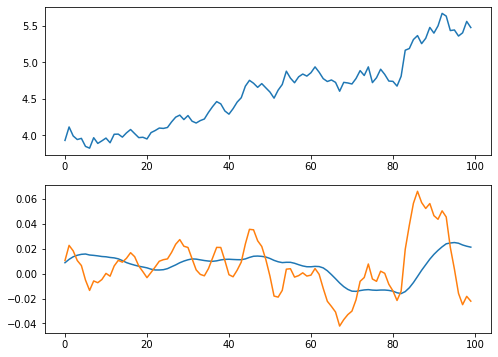

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d


g_curve = [np.nan] * len(df)
period = 20
sigma = 20

for i in range(period, len(df)):

  macd_hist = df['macd_hist'].values[i + 1 - period:i + 1]
  macd_hist_g = gaussian_filter1d(macd_hist, sigma=sigma, mode='reflect')
  g_curve[i] = macd_hist_g[-1] 

plot_size = 100

plt.subplot(211)
plt.plot(df['close'].values[period:][:plot_size])

plt.subplot(212) 
plt.plot(g_curve[period:][:plot_size])
plt.plot(df['macd_hist'].values[period:][:plot_size])

plt.show()

#### pr survey on gaussina macd

12777
12777
12777


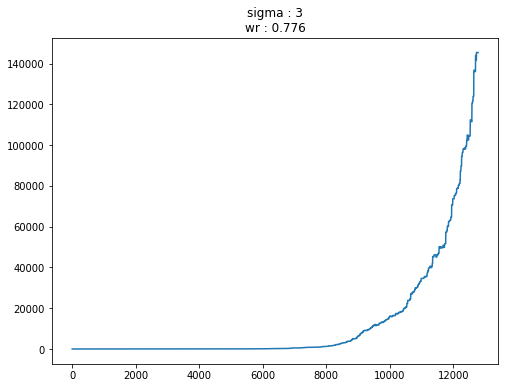

In [ ]:

g_curve = [np.nan] * len(df)
period = 20
sigma = 20

# for sigma in range(10, 50, 2):
# for sigma in range(1, 10, 1):
for sigma in range(3, 4, 1):

  #     realtime gaussian   #
  # for i in range(period, len(df)):

  #   macd_hist = df['macd_hist'].values[i + 1 - period:i + 1]
  #   macd_hist_g = gaussian_filter1d(macd_hist, sigma=sigma, mode='reflect')
  #   g_curve[i] = macd_hist_g[-1] 

  #     non realtime    #
  macd_hist = df['macd_hist'].values
  macd_hist_g = gaussian_filter1d(macd_hist, sigma=sigma, mode='reflect')
  g_curve = macd_hist_g

  g_curve_series = pd.Series(g_curve[period:])
  # print(g_curve_series.head())
  # break

  short_sig = np.where((g_curve_series.shift(1) < g_curve_series.shift(2)) &
                      (g_curve_series.shift(2) > g_curve_series.shift(3)), 1, 0)

  long_sig = np.where((g_curve_series.shift(1) > g_curve_series.shift(2)) &
                      (g_curve_series.shift(2) < g_curve_series.shift(3)), 1, 0)
  # print(short_sig)
  # break


  # print(np.argwhere(short_sig == 1).reshape(-1, ))
  # break

  short_sig_arg = np.argwhere(short_sig == 1).reshape(-1, )
  long_sig_arg = np.argwhere(long_sig == 1).reshape(-1, )
  print(len(long_sig))
  print(len(short_sig))

  close = df['close'].values[period:]
  print(len(close))
  # break

  #       1. check long version first    #
  #       2. entry long signal on close    #
  lvrg = 1
  fee = 0.0006
  pr_list = []

  for i in range(len(long_sig)):
    
    if long_sig[i]:

      ep = close[i]

      for j in range(i + 1, len(long_sig)):

        if short_sig[j]:

          pr = (close[j] / ep - 1 - fee) * lvrg + 1
          # print(pr)
          break

    else:

      pr = 1

    pr_list.append(pr)

  pr_list = np.array(pr_list)
  wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

  plt.plot(np.cumprod(pr_list))
  plt.title("sigma : %s\nwr : %.3f" % (sigma, wr))
  plt.show()



  


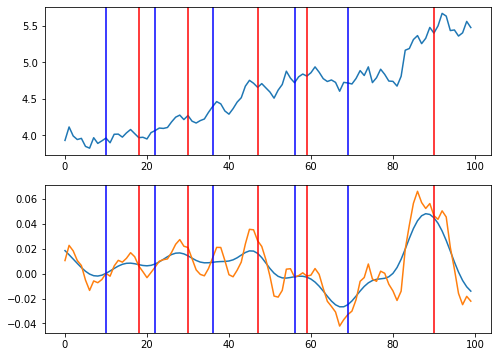

In [ ]:
g_curve_series = pd.Series(g_curve[period:])
# print(g_curve_series.head())
# break

short_sig = np.where((g_curve_series.shift(1) < g_curve_series.shift(2)) &
                    (g_curve_series.shift(2) > g_curve_series.shift(3)), 1, 0)

long_sig = np.where((g_curve_series.shift(1) > g_curve_series.shift(2)) &
                    (g_curve_series.shift(2) < g_curve_series.shift(3)), 1, 0)
# print(short_sig)
# break


# print(np.argwhere(short_sig == 1).reshape(-1, ))
# break

short_sig_arg = np.argwhere(short_sig == 1).reshape(-1, )
long_sig_arg = np.argwhere(long_sig == 1).reshape(-1, )

plot_size = 100

plt.subplot(211)
plt.plot(df['close'].values[period:][:plot_size])

for x_i in long_sig_arg:
  
  if x_i > plot_size:
    break

  plt.axvline(x_i, color='b')

for x_i in short_sig_arg:
  
  if x_i > plot_size:
    break

  plt.axvline(x_i, color='r')

plt.subplot(212) 
plt.plot(g_curve[period:][:plot_size])
plt.plot(df['macd_hist'].values[period:][:plot_size])

for x_i in long_sig_arg:
  
  if x_i > plot_size:
    break

  plt.axvline(x_i, color='b')

for x_i in short_sig_arg:
  
  if x_i > plot_size:
    break

  plt.axvline(x_i, color='r')


plt.show()

### time survey

                           open    high     low   close   volume    fish60      trix  macd_hist   Day sin   Day cos  Year sin  Year cos
2021-05-26 00:59:59.999  21.695  21.935  21.675  21.853  35086.6  0.342828 -0.002478  -0.000519  0.258819  0.965926  0.593654 -0.804720
2021-05-26 01:00:59.999  21.851  21.887  21.652  21.669  42075.8  0.750566 -0.002624  -0.008748  0.263031  0.964787  0.593645 -0.804727
2021-05-26 01:01:59.999  21.661  21.716  21.520  21.520  42291.5  0.960907 -0.004608  -0.025456  0.267238  0.963630  0.593635 -0.804734
2021-05-26 01:02:59.999  21.521  21.539  21.272  21.434  91689.2  0.852734 -0.008066  -0.040702  0.271440  0.962455  0.593626 -0.804741
2021-05-26 01:03:59.999  21.441  21.451  21.279  21.365  34986.6  0.637903 -0.012327  -0.052487  0.275637  0.961262  0.593616 -0.804749


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Text(0.5, 1.0, 'Time of day signal')

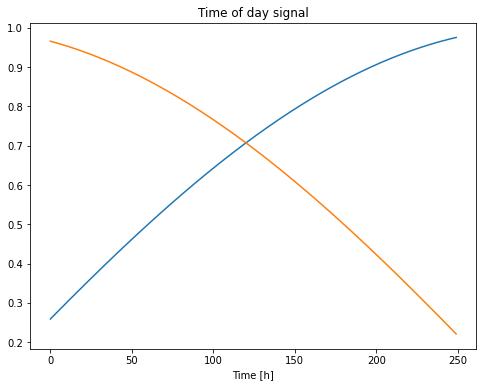

In [ ]:
timestamp_s = df.index.map(datetime.datetime.timestamp)

# print(timestamp_s)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

print(df.head())

plt.plot(np.array(df['Day sin'])[:250])
plt.plot(np.array(df['Day cos'])[:250])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

### target column

In [ ]:
target = "close"
target = "macd_hist"
# target = 'T (degC)'

#### fft

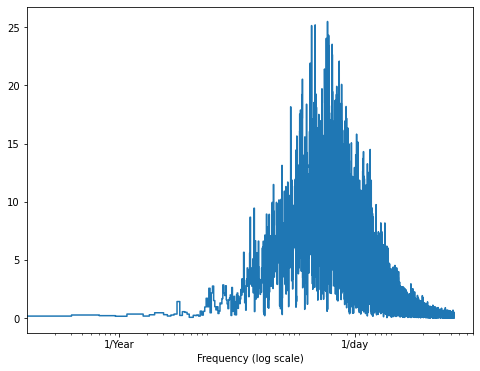

In [ ]:
fft = tf.signal.rfft(df[target])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[target])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
# plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

### data proc

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
print("num_features :", num_features)
print("column_indices :", column_indices)

num_features : 12
column_indices : {'open': 0, 'high': 1, 'low': 2, 'close': 3, 'volume': 4, 'fish60': 5, 'trix': 6, 'macd_hist': 7, 'Day sin': 8, 'Day cos': 9, 'Year sin': 10, 'Year cos': 11}


### scaling

In [ ]:
# train_mean = train_df.mean()
# train_std = train_df.std()

# train_df = (train_df - train_mean) / train_std
# val_df = (val_df - train_mean) / train_std
# test_df = (test_df - train_mean) / train_std

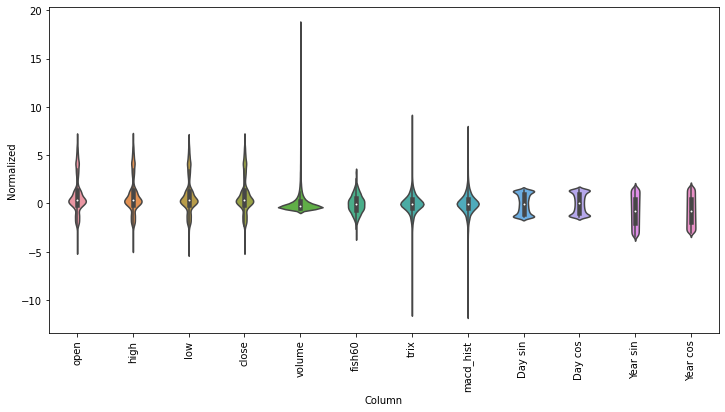

In [ ]:
# df_std = (df - train_mean) / train_std
# df_std = df_std.melt(var_name='Column', value_name='Normalized')
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df.keys(), rotation=90)

### windowing + retrain

In [ ]:
data_x, data_labels = [], []
close_x, label_close_x = [], []
data_index = []

input_size = 96
# input_size = 24
# label_size = 12
label_size = 24

# input_size = 12
# label_size = 12

# test_df_copy = test_df.copy()

# train_mean = train_df.mean()
# train_std = train_df.std()
# df_std = (df - train_mean) / train_std

column_indices = {name: i for i, name in enumerate(df.columns)}
num_features = df.shape[1]
print("num_features :", num_features)
print("column_indices :", column_indices)

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
min_max = MinMaxScaler()
std_scale = StandardScaler()

def min_max_scale(npy_x):

  return (npy_x - np.min(npy_x)) / (np.max(npy_x) - np.min(npy_x))

#       local scaling     #
for i in range(input_size, len(df) - label_size):
    
    # temp_data = df.values[i - input_size:i]
    # temp_labels = df.values[i:i + label_size]

    # scaled_data = min_max_scale(df.values[i - input_size:i + label_size])
    # scaled_data = min_max.fit_transform(df.values[i - input_size:i + label_size])
    # temp_data = scaled_data[:input_size]
    # temp_labels = scaled_data[input_size:]

    
    # temp_data = min_max.fit_transform(df.values[i - input_size:i])
    # temp_labels = min_max.transform(df.values[i:i + label_size])

    temp_data = std_scale.fit_transform(df.values[i - input_size:i])
    temp_labels = std_scale.transform(df.values[i:i + label_size])

    # print(df.index[i - input_size:i][-1])
    # print(df.index[i:i + label_size][0])
    # print()

    if np.isnan(np.sum(temp_data)):
      continue

    data_x.append(temp_data)
    data_labels.append(temp_labels)
    close_x.append(df.values[i - input_size:i, [3]])
    label_close_x.append(df.values[i:i + label_size, [3]])


data_x = np.array(data_x).astype(np.float32)

#       for conv2d      #
# data_x = np.array(data_x).astype(np.float32)
# data_x = np.expand_dims(data_x, axis=-1)

close_x = np.array(close_x)
label_close_x = np.array(label_close_x)
print("close_x.shape :", close_x.shape)

#         feature selection       #
# close_x = close_x[-len(test_df):]
# label_close_x = label_close_x[-len(test_df):]
data_x = data_x[:, :, [7]]
# data_x = data_x[:, :, [0, 1, 2, 3, 7]]
# data_x = data_x[:, :, :]

data_labels = np.array(data_labels).astype(np.float32)

# print(len(df) - total_window_size)
print("data_x.shape :", data_x.shape)
print("data_labels.shape :", data_labels.shape)

print("data_x.dtype :", data_x.dtype)
print("data_labels.dtype :", data_labels.dtype)

num_features : 12
column_indices : {'open': 0, 'high': 1, 'low': 2, 'close': 3, 'volume': 4, 'fish60': 5, 'trix': 6, 'macd_hist': 7, 'Day sin': 8, 'Day cos': 9, 'Year sin': 10, 'Year cos': 11}
close_x.shape : (28621, 96, 1)
data_x.shape : (28621, 96, 1)
data_labels.shape : (28621, 24, 12)
data_x.dtype : float32
data_labels.dtype : float32


### multi step - models

In [ ]:
MAX_EPOCHS = 100
MAX_EPOCHS = 200
# MAX_EPOCHS = 50

patience = MAX_EPOCHS // 5
# patience = 2

ckpt_path = current_path + 'ckpt/'

def compile_and_fit(model, model_name, train_x, train_y, val_x, val_y, patience=patience):

  tf.keras.backend.clear_session()

  checkpoint = tf.keras.callbacks.ModelCheckpoint(ckpt_path + model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                # optimizer=tf.optimizers.Adam(learning_rate=1e-4, decay=1e-5),
                optimizer=tf.optimizers.Adam(learning_rate=1e-3, decay=1e-4),
                metrics=[tf.metrics.MeanAbsoluteError()])
  

  history = model.fit(train_x, train_y, epochs=MAX_EPOCHS,
                      validation_data=(val_x, val_y),
                      callbacks=[checkpoint, early_stopping],
                      # callbacks=[early_stopping],
                      batch_size=32)
  return history

#### cnn

In [ ]:
# CONV_WIDTH = 12
CONV_WIDTH = input_size

multi_conv_model = tf.keras.Sequential([
      # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
      tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
      # Shape => [batch, 1, conv_units]
      tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
      # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),
      # Shape => [batch, 1,  out_steps*features]
      tf.keras.layers.Dense(label_size*num_features,
                            kernel_initializer=tf.initializers.zeros()),
      # Shape => [batch, label_size, features]
      tf.keras.layers.Reshape([label_size, num_features])
  ])

def conv_model():

  # CONV_WIDTH = 3
  # CONV_WIDTH = input_size
  multi_conv_model = tf.keras.Sequential([
      # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
      tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
      # Shape => [batch, 1, conv_units]
      tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
      # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),
      # Shape => [batch, 1,  out_steps*features]
      tf.keras.layers.Dense(label_size*num_features,
                            kernel_initializer=tf.initializers.zeros()),
      # Shape => [batch, label_size, features]
      tf.keras.layers.Reshape([label_size, num_features])
  ])

  return multi_conv_model


last_index : 15000
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.6200 - mean_absolute_error: 0.6048 - val_loss: 1.5223 - val_mean_absolute_error: 0.9462

Epoch 00001: val_loss improved from inf to 1.52234, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_15000.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6035 - mean_absolute_error: 0.5966 - val_loss: 1.5342 - val_mean_absolute_error: 0.9411

Epoch 00002: val_loss did not improve from 1.52234
Epoch 3/200
329/329 [==============================] - 1s 3ms/step - loss: 0.5976 - mean_absolute_error: 0.5942 - val_loss: 1.5342 - val_mean_absolute_error: 0.9441

Epoch 00003: va

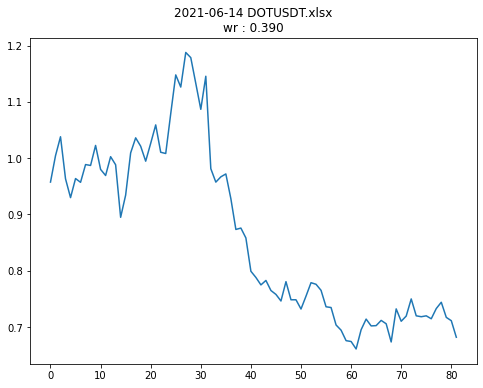

last_index : 16500
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.6580 - mean_absolute_error: 0.6122 - val_loss: 1.5797 - val_mean_absolute_error: 0.9597

Epoch 00001: val_loss improved from inf to 1.57966, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_16500.h5
Epoch 2/200
329/329 [==============================] - 1s 3ms/step - loss: 0.6190 - mean_absolute_error: 0.6003 - val_loss: 1.5565 - val_mean_absolute_error: 0.9505

Epoch 00002: val_loss improved from 1.57966 to 1.55645, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_16500.h5
Epoch 3/200
329/329 [=====

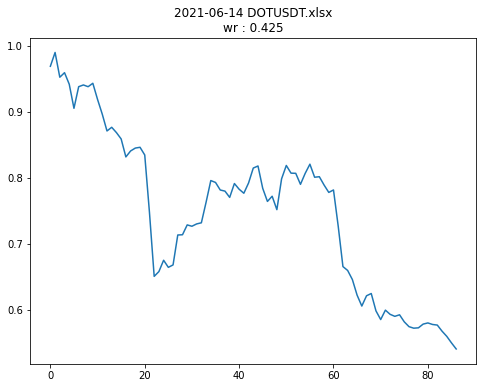

last_index : 18000
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.6658 - mean_absolute_error: 0.6138 - val_loss: 1.7917 - val_mean_absolute_error: 0.9879

Epoch 00001: val_loss improved from inf to 1.79175, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_18000.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6233 - mean_absolute_error: 0.5991 - val_loss: 1.7894 - val_mean_absolute_error: 0.9837

Epoch 00002: val_loss improved from 1.79175 to 1.78945, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_18000.h5
Epoch 3/200
329/329 [=====

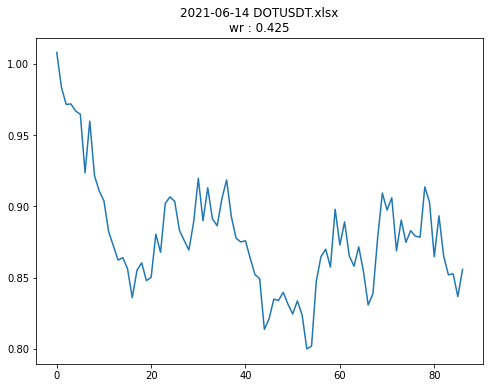

last_index : 19500
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.6614 - mean_absolute_error: 0.6175 - val_loss: 1.9797 - val_mean_absolute_error: 1.0303

Epoch 00001: val_loss improved from inf to 1.97969, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_19500.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6165 - mean_absolute_error: 0.6010 - val_loss: 1.8933 - val_mean_absolute_error: 1.0019

Epoch 00002: val_loss improved from 1.97969 to 1.89333, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_19500.h5
Epoch 3/200
329/329 [=====

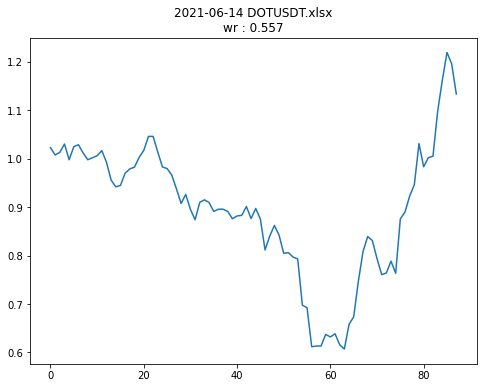

last_index : 21000
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.7117 - mean_absolute_error: 0.6226 - val_loss: 2.1830 - val_mean_absolute_error: 1.0790

Epoch 00001: val_loss improved from inf to 2.18301, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_21000.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6687 - mean_absolute_error: 0.6108 - val_loss: 2.0526 - val_mean_absolute_error: 1.0406

Epoch 00002: val_loss improved from 2.18301 to 2.05261, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_21000.h5
Epoch 3/200
329/329 [=====

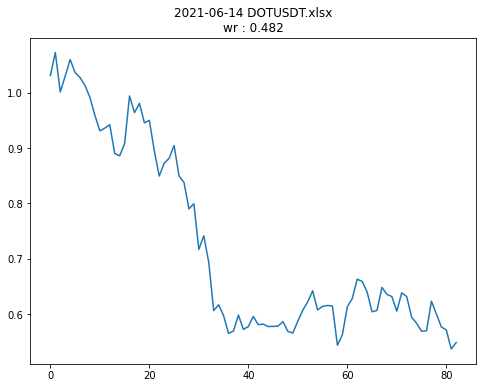

last_index : 22500
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 6ms/step - loss: 0.7228 - mean_absolute_error: 0.6310 - val_loss: 2.1672 - val_mean_absolute_error: 1.0837

Epoch 00001: val_loss improved from inf to 2.16719, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_22500.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6732 - mean_absolute_error: 0.6161 - val_loss: 2.0948 - val_mean_absolute_error: 1.0574

Epoch 00002: val_loss improved from 2.16719 to 2.09482, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_22500.h5
Epoch 3/200
329/329 [=====

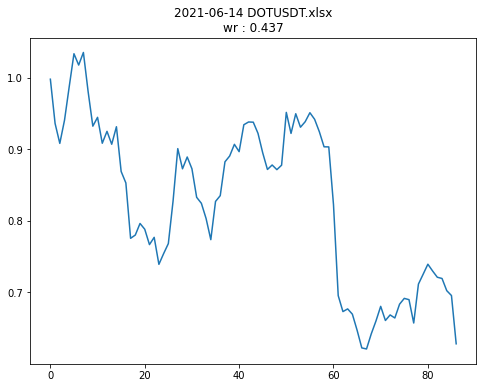

last_index : 24000
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.7899 - mean_absolute_error: 0.6460 - val_loss: 1.9905 - val_mean_absolute_error: 1.0689

Epoch 00001: val_loss improved from inf to 1.99049, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_24000.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.7215 - mean_absolute_error: 0.6292 - val_loss: 1.9198 - val_mean_absolute_error: 1.0471

Epoch 00002: val_loss improved from 1.99049 to 1.91979, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_24000.h5
Epoch 3/200
329/329 [=====

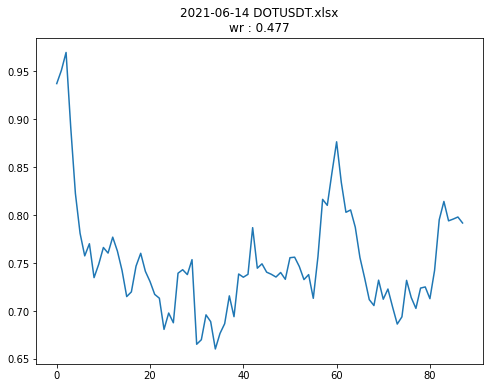

last_index : 25500
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.7315 - mean_absolute_error: 0.6368 - val_loss: 1.9554 - val_mean_absolute_error: 1.0523

Epoch 00001: val_loss improved from inf to 1.95536, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_25500.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6942 - mean_absolute_error: 0.6257 - val_loss: 1.9480 - val_mean_absolute_error: 1.0502

Epoch 00002: val_loss improved from 1.95536 to 1.94800, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_25500.h5
Epoch 3/200
329/329 [=====

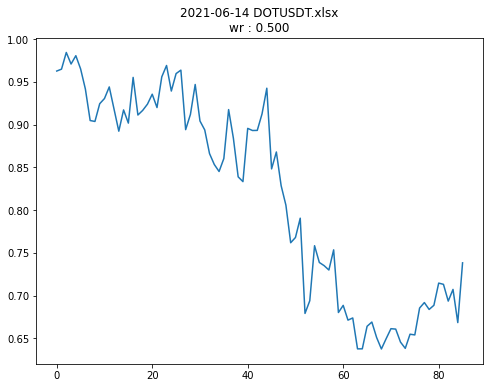

last_index : 27000
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.7788 - mean_absolute_error: 0.6531 - val_loss: 1.8916 - val_mean_absolute_error: 1.0453

Epoch 00001: val_loss improved from inf to 1.89159, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_27000.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.7225 - mean_absolute_error: 0.6330 - val_loss: 1.8552 - val_mean_absolute_error: 1.0352

Epoch 00002: val_loss improved from 1.89159 to 1.85515, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_27000.h5
Epoch 3/200
329/329 [=====

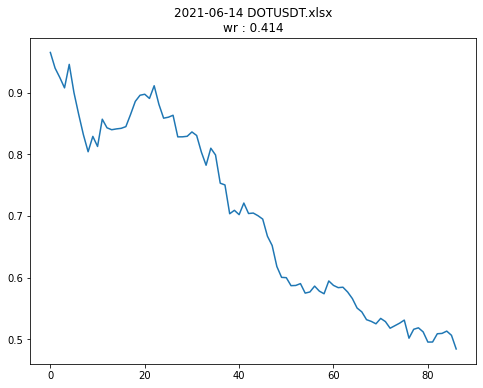

last_index : 28500
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 5ms/step - loss: 0.7371 - mean_absolute_error: 0.6398 - val_loss: 2.0253 - val_mean_absolute_error: 1.0843

Epoch 00001: val_loss improved from inf to 2.02533, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_28500.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6977 - mean_absolute_error: 0.6274 - val_loss: 1.9994 - val_mean_absolute_error: 1.0841

Epoch 00002: val_loss improved from 2.02533 to 1.99940, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_28500.h5
Epoch 3/200
329/329 [=====

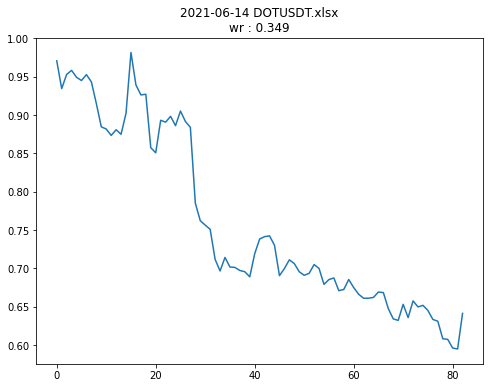

last_index : 30000


In [ ]:

#         1. data slicing      #
tvt_size = 15000
shift_size = int(tvt_size * 0.1)
shift_i = 0

#         2. calc, iteration number     #
# data_len = len(data_x)

target_label = target
target_label_index = column_indices[target_label]

while 1:



  last_index = tvt_size + shift_size * shift_i
  print("last_index :", last_index)
  # print("last_index :", last_index)

  slice_x = data_x[shift_size * shift_i :last_index]
  slice_labels = data_labels[shift_size * shift_i :last_index]
  slice_close_x = close_x[shift_size * shift_i :last_index]
  slice_label_close_x = label_close_x[shift_size * shift_i :last_index]

  if last_index > len(data_x):
    break

  else:
    shift_i += 1


  train_x = slice_x[:int(tvt_size * 0.7)]
  val_x = slice_x[int(tvt_size * 0.7):int(tvt_size * 0.9)]
  test_x = slice_x[int(tvt_size * 0.9):]

  print("len(train_x) :", len(train_x))
  print("len(val_x) :", len(val_x))
  print("len(test_x) :", len(test_x))

  train_labels = slice_labels[:int(tvt_size * 0.7)]
  val_labels = slice_labels[int(tvt_size * 0.7):int(tvt_size * 0.9)]
  test_labels = slice_labels[int(tvt_size * 0.9):]

  test_slice_close_x = slice_close_x[int(tvt_size * 0.9):]
  test_slice_label_close_x = slice_label_close_x[int(tvt_size * 0.9):]

  print("test_slice_close_x.shape :", test_slice_close_x.shape)
  print("test_slice_label_close_x.shape :", test_slice_label_close_x.shape)

  train_y = train_labels[:, :, [target_label_index]]
  val_y = val_labels[:, :, [target_label_index]]
  test_y = test_labels[:, :, [target_label_index]]

  print("train_labels.shape :", train_labels.shape)
  print("train_y.shape :", train_y.shape)
  print()


  #         train         #
  # model_name = 'multi_step_macdhist_cnn_ohlcmacd_lscale_std_%s_%s_%s_%s_%s.h5' % (key, input_size, label_size, CONV_WIDTH, last_index)
  model_name = 'multi_step_macdhist_cnn_ohlcmacd_lscale_mm_%s_%s_%s_%s_%s.h5' % (key, input_size, label_size, CONV_WIDTH, last_index)
  
  # multi_conv_model = conv_model()
  history = compile_and_fit(multi_conv_model, model_name, train_x, train_y, val_x, val_y)
  
  model = tf.keras.models.load_model(ckpt_path + model_name)
  test_result = model.predict(test_x)

  pred_y = test_result[:, :, target_label_index]

  fee = 0.0006
  lvrg = 5
  # lvrg = 1
  pr_list = []
  # plotting = True
  plotting = False

  i = 0
  while 1:
  # for i in range(len(test_y)):

    try:
      input = test_x[i, :, target_label_index]
    except:
      input = test_x[i, :, 0]


    label = test_y[i]
    pred = pred_y[i]

    input_close = test_slice_close_x[i, :, :]
    # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
    close = test_slice_label_close_x[i, :, :]

    #     find highest / lowest arg     #
    high_arg = np.argmax(pred)
    low_arg = np.argmin(pred)

    #     we always sell high, buy low    #
    pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

    if plotting:

      plt.subplot(211)
      plt.plot(np.arange(len(input_close)), input_close)
      plt.plot(np.arange(len(close)) + input_size, close)
      plt.axvline(high_arg + input_size)
      plt.axvline(low_arg + input_size)

      plt.subplot(212)
      plt.plot(np.arange(len(input)), input,
              label='Inputs', marker='.', zorder=-10)    
      plt.scatter(np.arange(len(label)) + input_size, label,
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
      plt.scatter(np.arange(len(pred)) + input_size, pred,
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)
      # plt.plot(pred)
      # plt.plot(label)
      plt.axvline(high_arg + input_size)
      plt.axvline(low_arg + input_size)


      plt.suptitle("%.3f" % pr)
      plt.show()

    pr_list.append(pr)

    #     i should moved to end of trading index    #
    #     long    #
    if high_arg > low_arg:
      i += high_arg
    else:
      i += low_arg

    # print("i :", i)

    if i >= len(test_y):
      break
    # else:
    #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

    #     shift, if trade complished    #

  pr_list = np.array(pr_list)
  wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

  plt.plot(np.cumprod(pr_list))
  plt.title("%s\nwr : %.3f" % (key, wr))
  plt.show()



##### check profit

In [ ]:
test_result = model.predict(test_x)

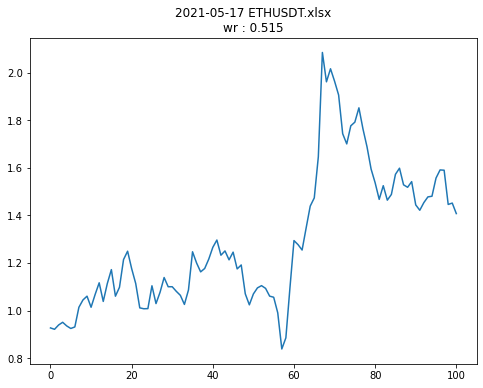

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### select target label

In [ ]:
try:
  input = train_x[0, :, target_label_index]
except:
  input = train_x[0, :, 0]  

label = train_y[0]

plt.plot(np.arange(len(input)), input,
          label='Inputs', marker='.', zorder=-10)    
plt.scatter(np.arange(len(label)) + input_size, label,
          edgecolors='k', label='Labels', c='#2ca02c', s=64)

plt.show()

In [ ]:
multi_val_performance = {}
multi_performance = {}

#### dense

In [ ]:
OUT_STEPS = label_size

multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

model_name = 'multi_step_macdhist_dense_macdhist_lscale_%s_%s_%s.h5' % (key, input_size, label_size)


In [ ]:
history = compile_and_fit(multi_dense_model, model_name)

IPython.display.clear_output()

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['Dense'] = model.evaluate(val_x, val_y)
multi_performance['Dense'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 2ms/step - loss: 3.7937 - mean_absolute_error: 1.3819


##### check profit

In [ ]:
test_result = model.predict(test_x)

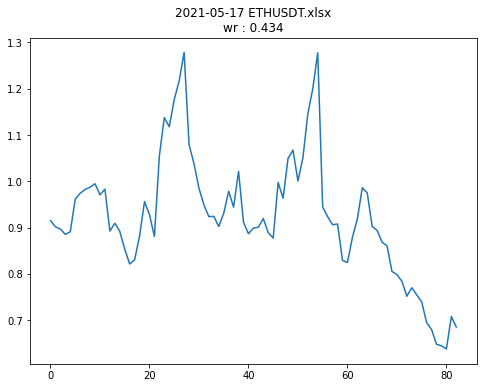

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### lstm

In [ ]:
OUT_STEPS = label_size

multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

model_name = 'multi_step_macdhist_lstm_macdhist_lscale_%s_%s_%s.h5' % (key, input_size, label_size)


In [ ]:
history = compile_and_fit(multi_lstm_model, model_name)

IPython.display.clear_output()

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['Dense'] = model.evaluate(val_x, val_y)
multi_performance['Dense'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 3ms/step - loss: 3.5484 - mean_absolute_error: 1.2996


##### check profit

In [ ]:
test_result = model.predict(test_x)

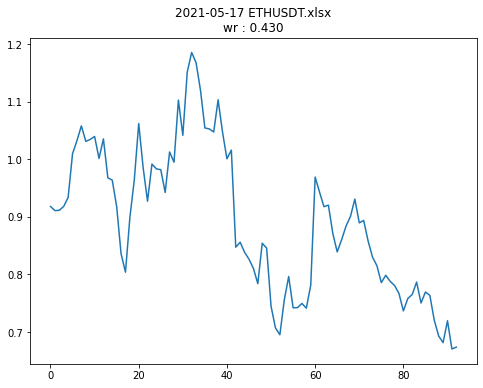

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### cnn 1d

In [ ]:
# CONV_WIDTH = 3
# CONV_WIDTH = 12
# CONV_WIDTH = input_size
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    # tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),
    # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),

    tf.keras.layers.Flatten(),

    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(label_size*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, label_size, features]
    tf.keras.layers.Reshape([label_size, num_features])
])

# key = "2021-06-14 ETHUSDT.xlsx"
# key = "2021-05-17 ETHUSDT.xlsx"
model_name = 'multi_step_macdhist_cnn1d_macdhist_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)

In [ ]:
history = compile_and_fit(multi_conv_model, model_name)


IPython.display.clear_output()

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['CNN1d'] = model.evaluate(val_x, val_y)
multi_performance['CNN1d'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 1s 13ms/step - loss: 0.9891 - mean_absolute_error: 0.7405


##### check profit

In [ ]:
test_result = model.predict(test_x)

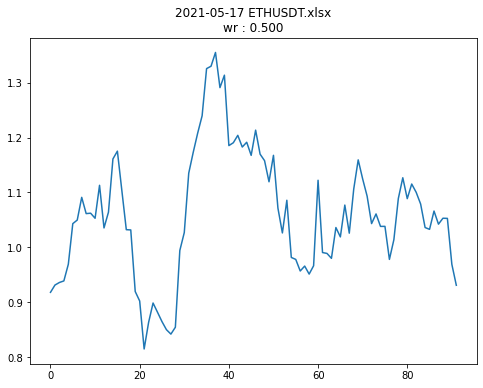

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### cnn 2d

In [ ]:
# CONV_WIDTH = 3
# CONV_WIDTH = 12
# CONV_WIDTH = input_size
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    # tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv2D(256, activation='relu', kernel_size=(3)),
    # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),

    tf.keras.layers.Flatten(),

    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(label_size*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, label_size, features]
    tf.keras.layers.Reshape([label_size, num_features])
])

# key = "2021-06-14 ETHUSDT.xlsx"
# key = "2021-05-17 ETHUSDT.xlsx"
# model_name = 'multi_step_macdhist_cnn2d_macdhist_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)
model_name = 'multi_step_macdhist_cnn2d_ohlcmacd_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)

In [ ]:
history = compile_and_fit(multi_conv_model, model_name)


IPython.display.clear_output()

Epoch 1/200
343/343 [==============================] - 64s 186ms/step - loss: 1.1681 - mean_absolute_error: 0.7786 - val_loss: 1.0932 - val_mean_absolute_error: 0.7604

Epoch 00001: val_loss improved from inf to 1.09318, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn2d_ohlcmacd_lscale_std_2021-05-17 ETHUSDT.xlsx_96_24.h5
Epoch 2/200
343/343 [==============================] - 65s 188ms/step - loss: 1.0896 - mean_absolute_error: 0.7459 - val_loss: 1.0951 - val_mean_absolute_error: 0.7627

Epoch 00002: val_loss did not improve from 1.09318
Epoch 3/200
343/343 [==============================] - 64s 187ms/step - loss: 1.0517 - mean_absolute_error: 0.7305 - val_loss: 1.1023 - val_mean_absolute_error: 0.7542

Epoch 00003: val_loss did not improve from 1.09318
Epoch 4/200
343/343 [==============================] - 64s 186ms/step - loss: 1.0205 - mean_absolute_error: 0.7195 - val_loss: 1.0956 - val_mean_absolute_error: 0.7605

Epoch 00004: val_loss did 

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['CNN'] = model.evaluate(val_x, val_y)
multi_performance['CNN'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 2ms/step - loss: 1.0011 - mean_absolute_error: 0.7511


##### check profit

In [ ]:
test_result = model.predict(test_x)

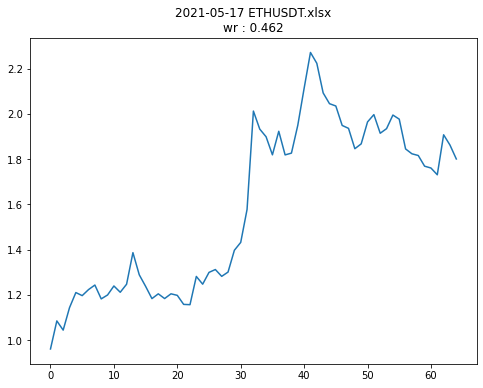

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### deep cnn 2d

In [ ]:
# CONV_WIDTH = 3
# CONV_WIDTH = 12
# CONV_WIDTH = input_size
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    # tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv2D(32, activation='relu', kernel_size=(3)),
    tf.keras.layers.Conv2D(64, activation='relu', kernel_size=(3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, activation='relu', kernel_size=(3)),
    tf.keras.layers.Conv2D(256, activation='relu', kernel_size=(3)),
    tf.keras.layers.BatchNormalization(),

    # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),

    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(label_size*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, label_size, features]
    tf.keras.layers.Reshape([label_size, num_features])
])

# key = "2021-06-14 ETHUSDT.xlsx"
# key = "2021-05-17 ETHUSDT.xlsx"
# model_name = 'multi_step_macdhist_cnn2d_macdhist_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)
model_name = 'multi_step_macdhist_cnn2d_ohlcmacd_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)

In [ ]:
history = compile_and_fit(multi_conv_model, model_name)


IPython.display.clear_output()

Epoch 1/200
343/343 [==============================] - 64s 186ms/step - loss: 1.1681 - mean_absolute_error: 0.7786 - val_loss: 1.0932 - val_mean_absolute_error: 0.7604

Epoch 00001: val_loss improved from inf to 1.09318, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn2d_ohlcmacd_lscale_std_2021-05-17 ETHUSDT.xlsx_96_24.h5
Epoch 2/200
343/343 [==============================] - 65s 188ms/step - loss: 1.0896 - mean_absolute_error: 0.7459 - val_loss: 1.0951 - val_mean_absolute_error: 0.7627

Epoch 00002: val_loss did not improve from 1.09318
Epoch 3/200
  4/343 [..............................] - ETA: 59s - loss: 0.8954 - mean_absolute_error: 0.6936

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['CNN'] = model.evaluate(val_x, val_y)
multi_performance['CNN'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 2ms/step - loss: 1.0011 - mean_absolute_error: 0.7511


##### check profit

In [ ]:
test_result = model.predict(test_x)

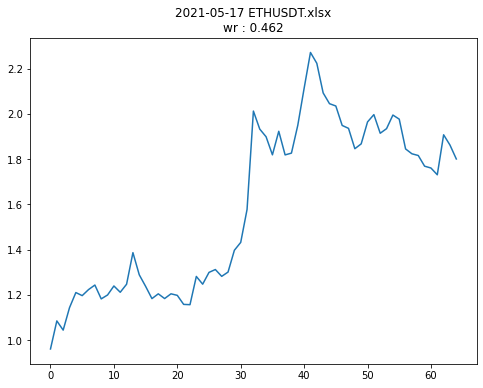

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### autoregressive

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

feedback_model = FeedBack(units=32, out_steps=label_size)

def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup
prediction, state = feedback_model.warmup(train_x)
prediction.shape

TensorShape([11022, 12])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call
print('Output shape (batch, time, features): ', feedback_model(train_x).shape)
# print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (11022, 24, 12)


In [ ]:
# history = compile_and_fit(feedback_model, multi_window)

model_name = 'multi_step_macdhist_ar_allfeature_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)

history = compile_and_fit(feedback_model, model_name)

IPython.display.clear_output()

In [ ]:
# model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['AR'] = feedback_model.evaluate(val_x, val_y)
multi_performance['AR'] = feedback_model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 5ms/step - loss: 2.3948 - mean_absolute_error: 1.1002


##### check profit

In [ ]:
test_result = feedback_model.predict(test_x)

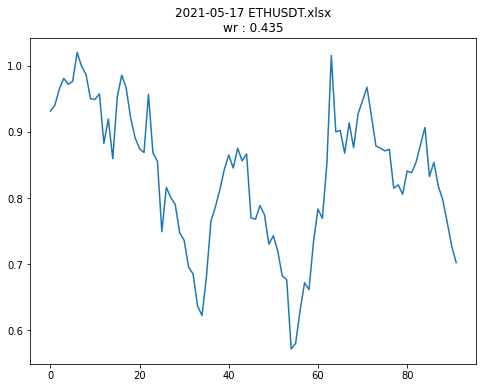

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### comparison

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Dense   : 1.8391
LSTM    : 1.9033
Conv    : 1.8230
AR LSTM : 2.3262
